In [ ]:
# import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## problem statement:

In [ ]:
# as operators are losing there cutomers in todays market
# telecom domain contain most specifically the following churning:
#     Tarrif plan churn   >> rs.300 to rs.179
#     Service Churn       >> Weekly/Monthly Subscription
#     Product Churn       >> Postpaid/Prepaid
#     Usage Churn         >> Inactive /Zero balance
    
#     Which leads to Subscriber Churn



## Data Gathering

In [3]:
telco_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [ ]:
# first we have to analyse the ratio of the customers who are getting churned with respect to non churned customers.

In [4]:
telco_data.shape

(7043, 21)

In [5]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# describe >> which will give us insights of mean,count,max,min,25%... ( desciptive statistics)

In [8]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### lets check for outliers

<AxesSubplot:xlabel='tenure'>

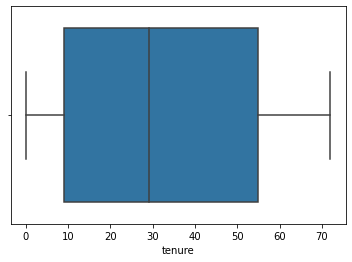

In [9]:
sns.boxplot(telco_data["tenure"])

<AxesSubplot:xlabel='MonthlyCharges'>

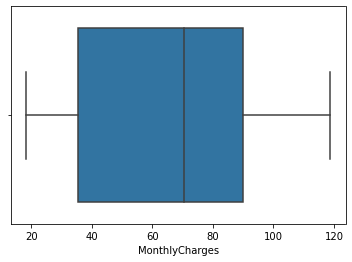

In [10]:
sns.boxplot(telco_data["MonthlyCharges"])

In [11]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# lets check whether null value are present

In [13]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# lets identify the churners ratio

In [15]:
telco_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
(telco_data["Churn"].value_counts()/len(telco_data["Churn"]))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [17]:
# lets check plot

Text(0.5, 1.0, 'count of customer based on churned category')

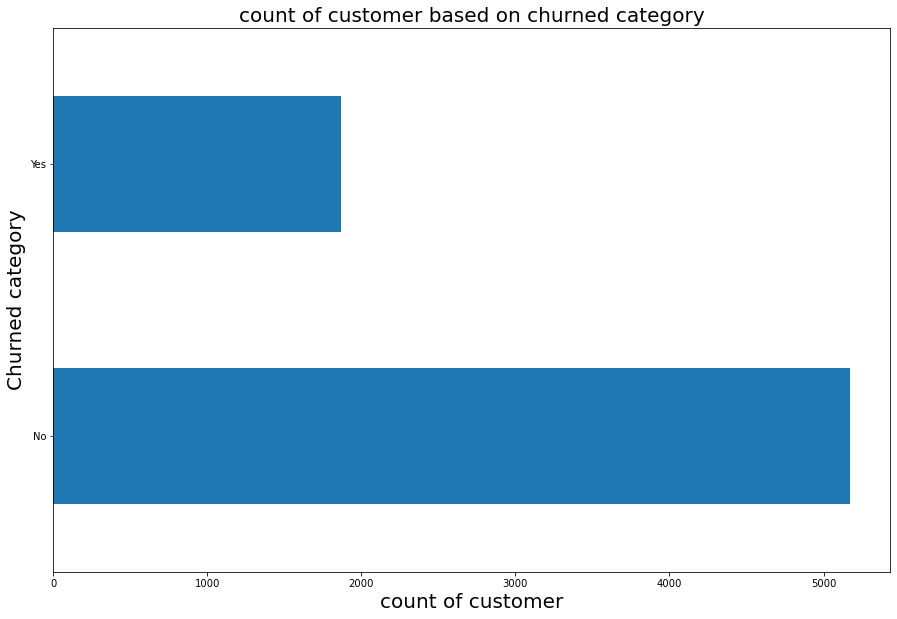

In [18]:
telco_data["Churn"].value_counts().plot(kind="barh",figsize=(15,10))
plt.xlabel("count of customer",fontsize=20)
plt.ylabel("Churned category",fontsize=20)
plt.title("count of customer based on churned category",fontsize=20)

In [19]:
# lets check percentage of missing values in dataset

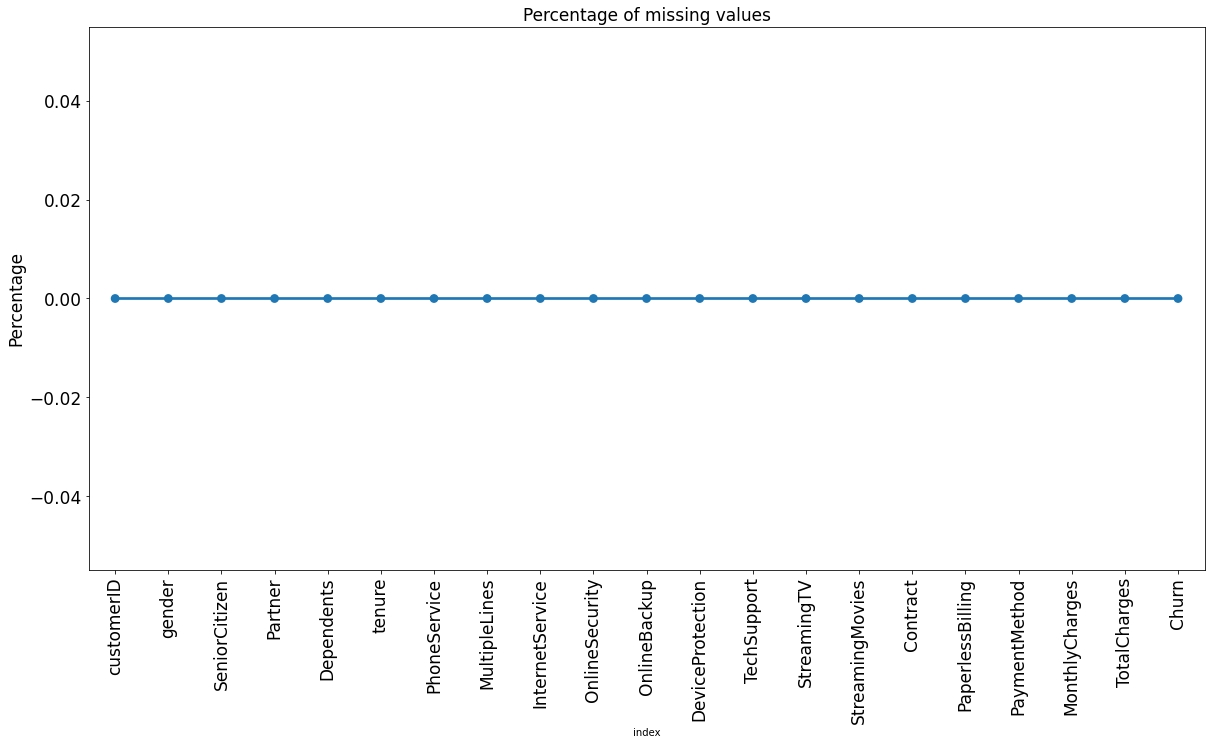

In [20]:
missing_values = pd.DataFrame((telco_data.isna().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize=(20,10))
ax=sns.pointplot("index",0,data=missing_values)
plt.xticks(rotation=90,fontsize=17)
plt.yticks(fontsize=17)
plt.ylabel("Percentage",fontsize=17)
plt.title("Percentage of missing values",fontsize=17)
plt.show()

## Data Engineering

In [21]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
df1=telco_data.copy()

In [23]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df1["TotalCharges"].dtype

dtype('O')

In [26]:
# total charges dtype should be numeric instead object so we will convert it into numeric

In [27]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors="coerce")
df1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df1.loc[df1["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [29]:
df1["TotalCharges"].isna().sum()

11

In [30]:
df1["TotalCharges"].mean()

2283.3004408418697

In [31]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
df1["TotalCharges"] = df1["TotalCharges"].fillna(df1["TotalCharges"].mean())
df1["TotalCharges"].isna().sum()

0

In [33]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df1.shape

(7043, 21)

In [36]:
df1["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [37]:
# we will create groups to analyse better 
# divude the customers into beans based on tenure e.g. for tenure<12 months , assign a tenure group if 1-12,
# for tenure between 1-2 years ,tenure group of 13-24: so on

In [38]:
print(df1["tenure"].max())

72


In [39]:
# here we can make 6 groups each  of 12 months

labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df1["tenure_group"]=pd.cut(df1.tenure,range(1,80,12),right=False,labels=labels)
df1["tenure_group"]

0        1 - 12
1       25 - 36
2        1 - 12
3       37 - 48
4        1 - 12
         ...   
7038    13 - 24
7039    61 - 72
7040     1 - 12
7041     1 - 12
7042    61 - 72
Name: tenure_group, Length: 7043, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [40]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Remove columns those are not required

In [41]:
df1.drop(columns=["customerID","tenure"],axis=1,inplace=True)

In [42]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Lets analyse the data

In [43]:
# now lets take overview of churners based on each features we have

In [44]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

### 1.gender

<AxesSubplot:xlabel='gender', ylabel='count'>

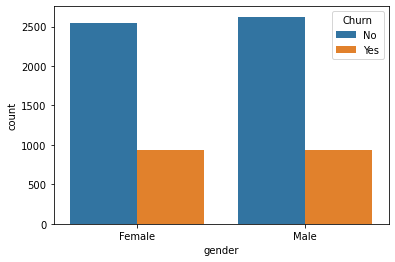

In [45]:
sns.countplot(x=df1["gender"],hue=df1["Churn"])

In [46]:
df1.groupby("gender")["Churn"].value_counts()


gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

### 2.SeniorCitizen

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

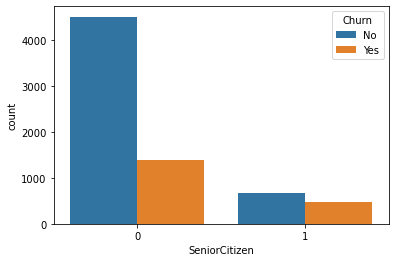

In [47]:
sns.countplot(x=df1["SeniorCitizen"],hue=df1["Churn"])

In [48]:
df1.groupby("SeniorCitizen")["Churn"].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

### 3.Partner

<AxesSubplot:xlabel='Partner', ylabel='count'>

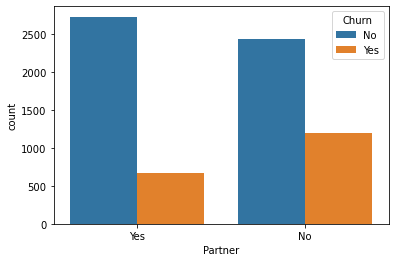

In [49]:
sns.countplot(x=df1["Partner"],hue=df1["Churn"])

In [50]:
df1.groupby("Partner")["Churn"].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

### 4. Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

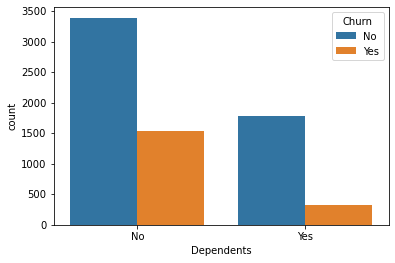

In [51]:
sns.countplot(x=df1["Dependents"],hue=df1["Churn"])

In [52]:
df1.groupby("Dependents")["Churn"].value_counts()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

### 5.PhoneService

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

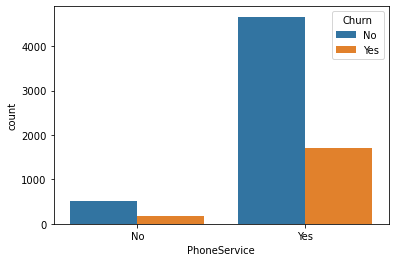

In [53]:
sns.countplot(x=df1["PhoneService"],hue=df1["Churn"])

In [54]:
df1.groupby("PhoneService")["Churn"].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

### 6.MultipleLines

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

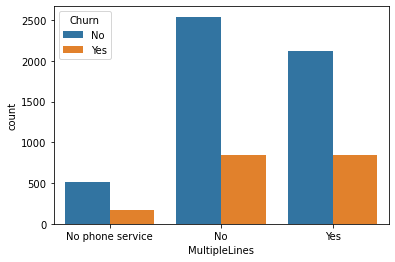

In [55]:
sns.countplot(x=df1["MultipleLines"],hue=df1["Churn"])

In [56]:
df1.groupby("MultipleLines")["Churn"].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

### 7.InternetService

<AxesSubplot:xlabel='InternetService', ylabel='count'>

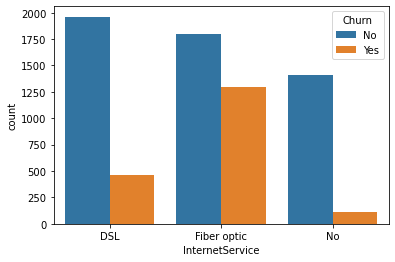

In [57]:
sns.countplot(x=df1["InternetService"],hue=df1["Churn"])

In [58]:
df1.groupby("InternetService")["Churn"].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

### 8.OnlineSecurity

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

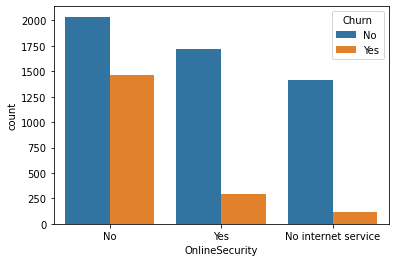

In [59]:
sns.countplot(x=df1["OnlineSecurity"],hue=df1["Churn"])

In [60]:
df1.groupby("OnlineSecurity")["Churn"].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

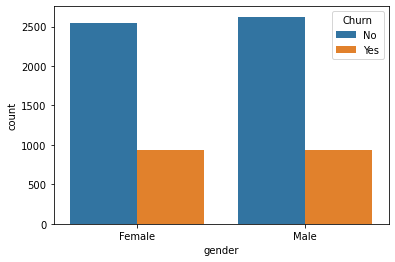

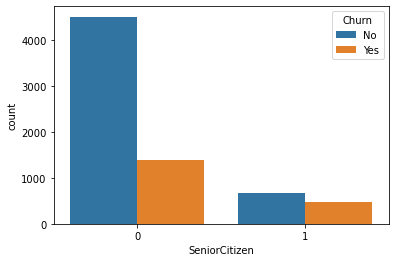

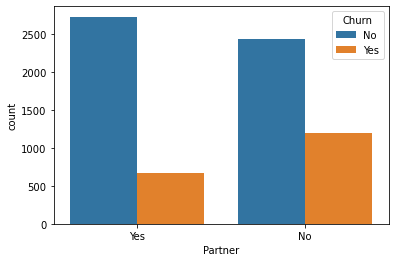

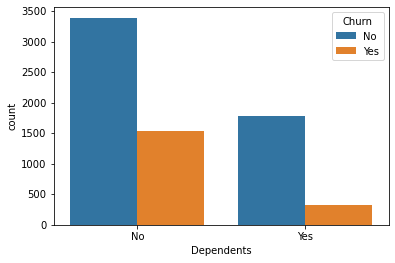

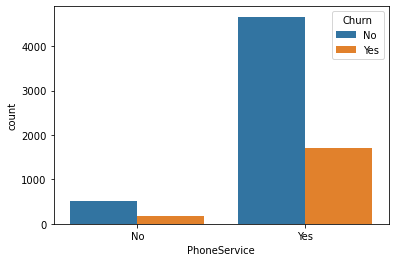

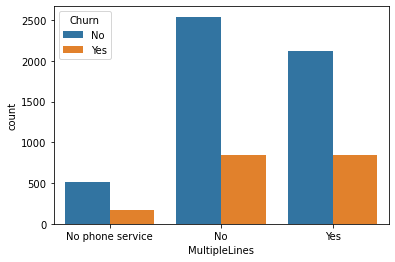

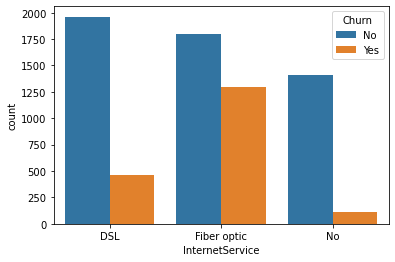

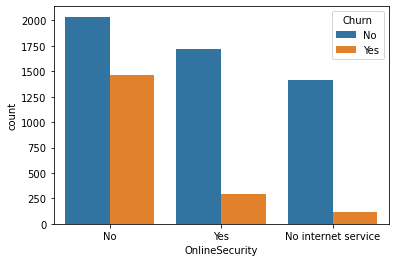

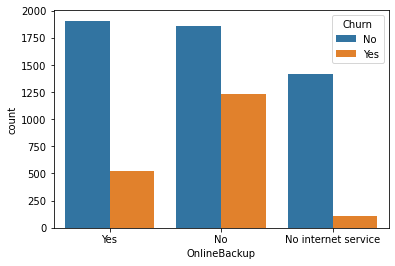

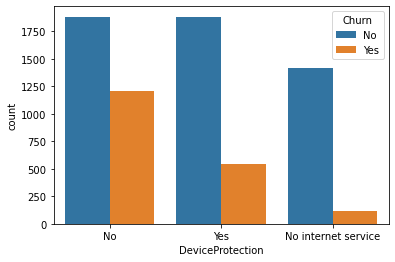

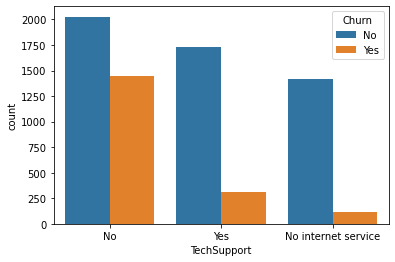

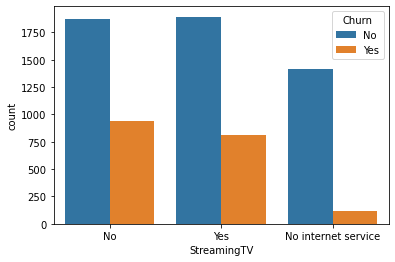

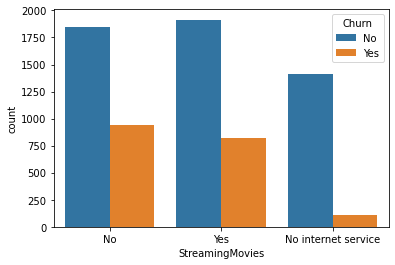

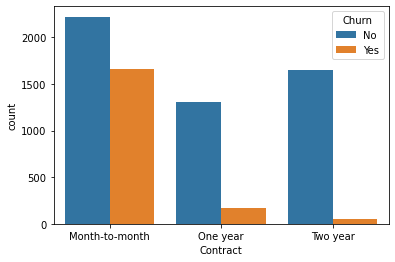

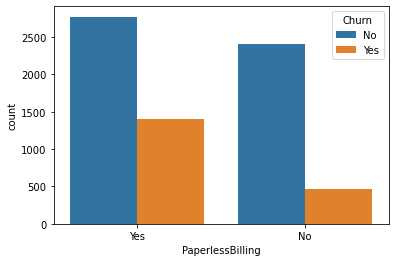

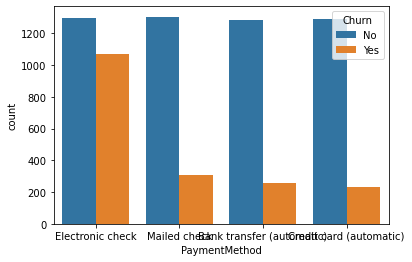

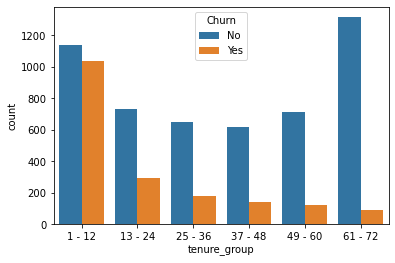

In [61]:
for i,predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df1,x=predictor,hue=df1["Churn"])


### convert our target variable into binary numeric variables i.e Yes=1, No=0

In [62]:
df1["Churn"]=np.where(df1.Churn=="Yes",1,0)

In [63]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### convert all categorical variables into dummy variables

In [64]:
df1["gender"].nunique()

2

In [65]:
df1["DeviceProtection"].nunique()

3

In [66]:
df1=pd.get_dummies(df1)
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int32  
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

Text(0.5, 1.0, 'Churning based on Monthly charges')

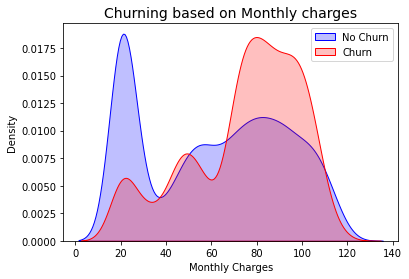

In [68]:
Mch= sns.kdeplot(df1.MonthlyCharges[(df1["Churn"]==0)],
                color="Blue",shade=True)

Mch=sns.kdeplot(df1.MonthlyCharges[(df1["Churn"]==1)],color="Red",shade=True)
Mch.legend(["No Churn","Churn"],loc="upper right")
Mch.set_xlabel("Monthly Charges")
Mch.set_title("Churning based on Monthly charges",fontsize=14)

In [69]:
# here we can observe that churn value is high as monthly charges are high

Text(0.5, 1.0, 'Churn based on Total Charges values')

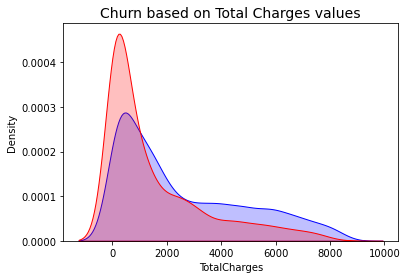

In [70]:
Tch = sns.kdeplot(df1.TotalCharges[(df1["Churn"]==0)],
                 color="Blue",shade=True)
Tch = sns.kdeplot(df1.TotalCharges[(df1["Churn"]==1)],
                 color="red",shade=True)
Tch.set_xlabel("TotalCharges")
Tch.set_title("Churn based on Total Charges values",fontsize=14)

### Now lets get plot of which features are more likely to be giving more insights for the churning thing

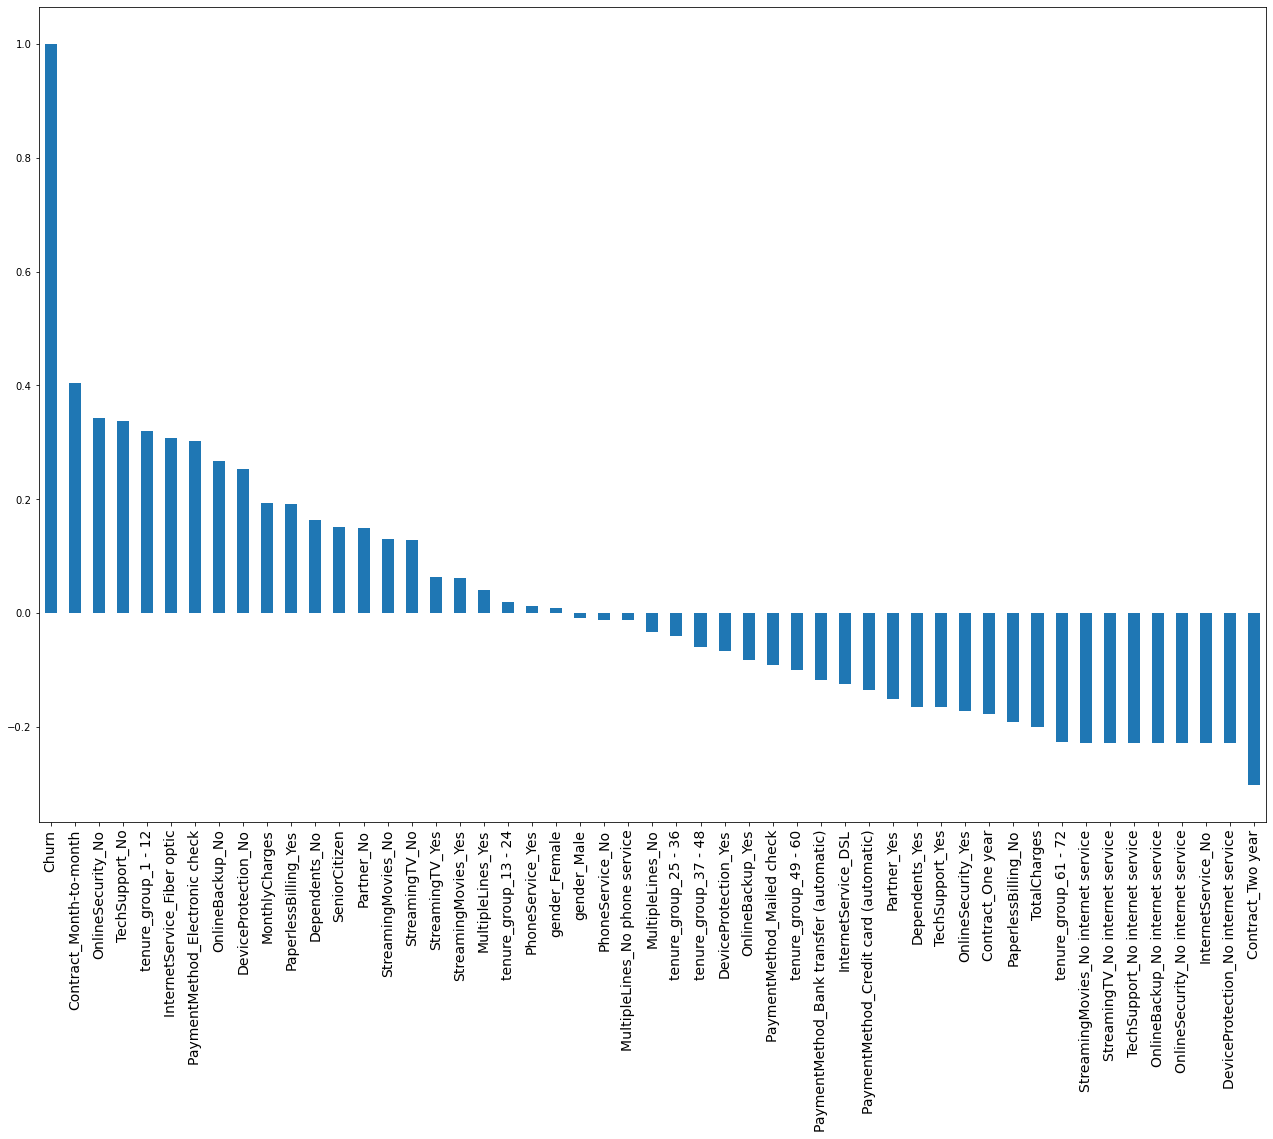

In [71]:
plt.figure(figsize=(22,15))
df1.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.xticks(fontsize=14)
plt.show()

In [72]:
df1.to_csv("tel_churn.csv")

In [73]:
df1.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2283.300441,0.265370,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.219225,0.216101,0.335794,0.228880,0.308817,0.145393,0.118131,0.108193,0.118131,0.199773
std,0.368612,30.090047,2265.000258,0.441561,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.413751,0.411613,0.472301,0.420141,0.462038,0.352521,0.322787,0.310645,0.322787,0.399858
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.350000,1400.550000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Now lets move to Model building

In [74]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV



In [75]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [76]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [77]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [109]:
df.shape

(7043, 51)

In [110]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### As we can see here that the dataset is imbalanced one so we will use SMOTE technique to make it balanced

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [87]:
x1=df.drop("Churn",axis=1)

In [88]:
y1=df["Churn"]

In [89]:
sm=SMOTE(k_neighbors=5,random_state=45)
x_sample,y_sample=sm.fit_resample(x1,y1)

In [90]:
y_sample.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [93]:
x=x_sample

In [94]:
y=y_sample

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

### Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

### Model Selection

In [111]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Model Evaluation

In [112]:
# training
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy*100)

cls_report = classification_report(y_train,y_pred_train)
print("CLASSIFICATION REPORT\n",cls_report)

Confusion Matrix
 [[3880    1]
 [   8 3872]]
ACCURACY 99.88403556242751
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761



In [113]:
# testing
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy*100)

clf_report = classification_report(y_test,y_pred_test)
print("CLASSIFICATION REPORT\n",clf_report)

Confusion Matrix
 [[1040  253]
 [ 249 1045]]
ACCURACY 80.59528411287205
CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1293
           1       0.81      0.81      0.81      1294

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



### Hyper parameter Tuning

In [115]:
dt_model = DecisionTreeClassifier()
hyper_para = {"criterion" :['gini',"entropy"],
"max_depth":np.arange(2,8),
"min_samples_split":np.arange(3,20),
"min_samples_leaf":np.arange(3,15),
}
rscv_dt_clf = RandomizedSearchCV(dt_model,hyper_para,cv=5)
rscv_dt_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [116]:
rscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=13)

In [117]:
dt_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=13)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=13)

In [120]:
#training
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix\n",cnf_matrix)

Accuaracy = accuracy_score(y_train,y_pred_train)
print("Accuracy",Accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion matrix
 [[3215  666]
 [ 653 3227]]
Accuracy 0.8059528411287206
Classification report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      3881
           1       0.83      0.83      0.83      3880

    accuracy                           0.83      7761
   macro avg       0.83      0.83      0.83      7761
weighted avg       0.83      0.83      0.83      7761



In [121]:
#testing
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion matrix\n",cnf_matrix)

Accuaracy = accuracy_score(y_test,y_pred_test)
print("Accuracy",Accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion matrix
 [[1065  228]
 [ 236 1058]]
Accuracy 0.8059528411287206
Classification report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1293
           1       0.82      0.82      0.82      1294

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



### Random Forest classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

### Model training

In [125]:
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
#Training
y_pred_train = rf_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy*100)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[3873    8]
 [   1 3879]]
accuracy 99.88403556242751
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761



In [128]:
#Testing
y_pred_test = rf_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy*100)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[1153  140]
 [ 224 1070]]
accuracy 85.92964824120602
clf_report
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1293
           1       0.88      0.83      0.85      1294

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



### HyperParamter Tuning

In [133]:
hyperparamter = {"n_estimators":np.arange(10,20),
"criterion":["gini","entropy"],
"max_depth" :np.arange(4,10),
"min_samples_split":np.arange(3,10),
"min_samples_leaf":np.arange(3,10),
"max_features":["sqrt", "log2"],
"random_state":[41,42,43,44,45],
"oob_score":[True]}
rdscv = RandomizedSearchCV(rf_clf,hyperparamter,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=9,
                                                    max_features='log2',
                                                    min_samples_leaf=4,
                                                    min_samples_split=8,
                                                    n_estimators=18,
                                                    oob_score=True,
                                                    random_state=43),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

In [134]:
rdscv.best_estimator_


RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=13, oob_score=True, random_state=41)

In [135]:
rf_clf= RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=13, oob_score=True, random_state=41)

In [136]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=13, oob_score=True, random_state=41)

In [138]:
# training
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusioin Matrix\n",cnf_matrix)

Accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy",Accuracy*100)

clf_report=classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusioin Matrix
 [[3164  717]
 [ 379 3501]]
Accuracy 85.87810849117382
Classification report
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3881
           1       0.83      0.90      0.86      3880

    accuracy                           0.86      7761
   macro avg       0.86      0.86      0.86      7761
weighted avg       0.86      0.86      0.86      7761



In [139]:
# testing
y_pred_test = rf_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy",Accuracy*100)

clf_report=classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion Matrix
 [[1027  266]
 [ 158 1136]]
Accuracy 83.61035948975648
Classification report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1293
           1       0.81      0.88      0.84      1294

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587



### SVM

In [140]:
from sklearn.svm import SVC

In [141]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

### Evaluation

In [143]:
#Training Data
y_pred_train = svc_model.predict(x_train)

cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy*100)

clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

confusion matrix
 [[2840 1041]
 [1703 2177]]
accuarcy 64.64373147790234
classification report               precision    recall  f1-score   support

           0       0.63      0.73      0.67      3881
           1       0.68      0.56      0.61      3880

    accuracy                           0.65      7761
   macro avg       0.65      0.65      0.64      7761
weighted avg       0.65      0.65      0.64      7761



In [144]:
#Testing Data
y_pred = svc_model.predict(x_test)

cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)

accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy*100)

clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

confusion matrix
 [[927 366]
 [566 728]]
accuarcy 63.973714727483575
classification report               precision    recall  f1-score   support

           0       0.62      0.72      0.67      1293
           1       0.67      0.56      0.61      1294

    accuracy                           0.64      2587
   macro avg       0.64      0.64      0.64      2587
weighted avg       0.64      0.64      0.64      2587



### Adaboost classifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [150]:
#training
y_pred_train = ada_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[3248  633]
 [ 487 3393]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      3881
           1       0.84      0.87      0.86      3880

    accuracy                           0.86      7761
   macro avg       0.86      0.86      0.86      7761
weighted avg       0.86      0.86      0.86      7761

ACCURACY 85.56886999098055


In [151]:
# testing
y_pred_test =ada_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[1086  207]
 [ 168 1126]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1293
           1       0.84      0.87      0.86      1294

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

ACCURACY 85.50444530344028


### Hyperparameter Tuning

In [153]:
ada_clf=AdaBoostClassifier()
hyperparameter = {"n_estimators":np.arange(10,50),
                 "learning_rate":np.arange(0,2,0.001)}
rscv_adb = RandomizedSearchCV(ada_clf,hyperparameter,cv=5)
rscv_adb.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [155]:
rscv_adb.best_estimator_

AdaBoostClassifier(learning_rate=1.733, n_estimators=35)

In [156]:
ada_clf=AdaBoostClassifier(learning_rate=1.733, n_estimators=35)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.733, n_estimators=35)

In [157]:
#training
y_pred_train = ada_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[2980  901]
 [ 486 3394]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      3881
           1       0.79      0.87      0.83      3880

    accuracy                           0.82      7761
   macro avg       0.83      0.82      0.82      7761
weighted avg       0.83      0.82      0.82      7761

ACCURACY 82.12859167633036


In [158]:
# testing
y_pred_test =ada_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_report)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy*100)

Confusion Matrix
 [[ 978  315]
 [ 174 1120]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1293
           1       0.78      0.87      0.82      1294

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587

ACCURACY 81.09779667568611


### Lets see the accuracy we've got by the models

In [159]:
ACCURACY_df = pd.DataFrame({"MODEL":["Decision tree","Decision tree with Hyperparameter",
                            "Random Forest","Random Forest with Hyperparameter","SVM",
                            "Adaboost classifier","Adaboost classifier with Hyperparameter Tuning"],
                   "Training Accuracy":[99.88,80.59,99.88,85.87,64.64,85.56,82.12],
                   "Testing Accuracy":[80.59,80.59,85.92,83.61,63.97,85.50,81.09],
                   })
ACCURACY_df

,MODEL,Training Accuracy,Testing Accuracy
0,Decision tree,99.88,80.59
1,Decision tree with Hyperparameter,80.59,80.59
2,Random Forest,99.88,85.92
3,Random Forest with Hyperparameter,85.87,83.61
4,SVM,64.64,63.97
5,Adaboost classifier,85.56,85.50
6,Adaboost classifier with Hyperparameter Tuning,82.12,81.09
